In [2]:
"""Import the necessary modules:""" 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 100)

import numpy as np

import pandas_profiling

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
sns.set_context("talk")
import itertools

from statistics import mode

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, f1_score,precision_recall_fscore_support
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.decomposition import PCA


import functions as func
%reload_ext autoreload
%autoreload 2

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Data Cleaning and Exploratory Data Analysis

In [158]:
df = pd.read_excel("default of credit card clients.xls", skiprows = 1)
df

WARNING *** file size (5539329) not 512 + multiple of sector size (512)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         -1     -2     -2       3913       3102        689          0   
1          0      0      2       2682       1725       2682       3272   
2          0      0      0      29239      14027      13559      14331   
3          0      0      0      46990      48233      49291      28314   
4          0      0      0       8617       5670      35835      20940   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0     188948     192815     208365      88004   
29996     -1      0      0       1683       1828       3502       8979   
29997     -1      0      0       3565       3356       2758      20878   
29998      0      0     -1      -1645      78379      76304      52774   
29999      0      0      0      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0              0          0         0       689         0         0         0   
1           3455       3261         0      1000      1000      1000         0   
2          14948      15549      1518      1500      1000      1000      1000   
3          28959      29547      2000      2019      1200      1100      1069   
4          19146      19131      2000     36681     10000      9000       689   
...          ...        ...       ...       ...       ...       ...       ...   
29995      31237      15980      8500     20000      5003      3047      5000   
29996       5190          0      1837      3526      8998       129         0   
29997      20582      19357         0         0     22000      4200      2000   
29998      11855      48944     85900      3409      1178      1926     52964   
29999      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  default payment next month  
0             0                           1  
1          2000                           1  
2          5000                           0  
3          1000                           0  
4           679                           0  
...         ...                         ...  
29995      1000                           0  
29996         0                           0  
29997      3100                           1  
29998      1804                           1  
29999      1000                           1  

[30000 rows x 25 columns]

In [159]:
#Rename column headers to indicate months
df.rename(mapper = {"MARRIAGE" : "marital_status", "PAY_0" : "pay_sep", "PAY_2" : "pay_aug", "PAY_3" : "pay_jul", "PAY_4" : "pay_jun",
                    "PAY_5" : "pay_may", "PAY_6" : "pay_apr", "BILL_AMT1" : "bill_amt_sep", "BILL_AMT2" : "bill_amt_aug", "BILL_AMT3" : "bill_amt_jul",
                    "BILL_AMT4" : "bill_amt_jun", "BILL_AMT5" : "bill_amt_may", "BILL_AMT6" : "bill_amt_apr", "PAY_AMT1" : "pay_amt_sep",
                    "PAY_AMT2" : "pay_amt_aug", "PAY_AMT3" : "pay_amt_jul", "PAY_AMT4" : "pay_amt_jun", "PAY_AMT5" : "pay_amt_may",
                    "PAY_AMT6" : "pay_amt_apr", "default payment next month":"default_payment_next_month"}, axis = 1, inplace = True)
df.columns = df.columns.map(lambda x: x.lower())

#Descriptive statistics
df.describe(include = "all").T

count           mean            std       min  \
id                          30000.0   15000.500000    8660.398374       1.0   
limit_bal                   30000.0  167484.322667  129747.661567   10000.0   
sex                         30000.0       1.603733       0.489129       1.0   
education                   30000.0       1.853133       0.790349       0.0   
marital_status              30000.0       1.551867       0.521970       0.0   
age                         30000.0      35.485500       9.217904      21.0   
pay_sep                     30000.0      -0.016700       1.123802      -2.0   
pay_aug                     30000.0      -0.133767       1.197186      -2.0   
pay_jul                     30000.0      -0.166200       1.196868      -2.0   
pay_jun                     30000.0      -0.220667       1.169139      -2.0   
pay_may                     30000.0      -0.266200       1.133187      -2.0   
pay_apr                     30000.0      -0.291100       1.149988      -2.0   
bill_amt_sep                30000.0   51223.330900   73635.860576 -165580.0   
bill_amt_aug                30000.0   49179.075167   71173.768783  -69777.0   
bill_amt_jul                30000.0   47013.154800   69349.387427 -157264.0   
bill_amt_jun                30000.0   43262.948967   64332.856134 -170000.0   
bill_amt_may                30000.0   40311.400967   60797.155770  -81334.0   
bill_amt_apr                30000.0   38871.760400   59554.107537 -339603.0   
pay_amt_sep                 30000.0    5663.580500   16563.280354       0.0   
pay_amt_aug                 30000.0    5921.163500   23040.870402       0.0   
pay_amt_jul                 30000.0    5225.681500   17606.961470       0.0   
pay_amt_jun                 30000.0    4826.076867   15666.159744       0.0   
pay_amt_may                 30000.0    4799.387633   15278.305679       0.0   
pay_amt_apr                 30000.0    5215.502567   17777.465775       0.0   
default_payment_next_month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
id                           7500.75   15000.5   22500.25    30000.0  
limit_bal                   50000.00  140000.0  240000.00  1000000.0  
sex                             1.00       2.0       2.00        2.0  
education                       1.00       2.0       2.00        6.0  
marital_status                  1.00       2.0       2.00        3.0  
age                            28.00      34.0      41.00       79.0  
pay_sep                        -1.00       0.0       0.00        8.0  
pay_aug                        -1.00       0.0       0.00        8.0  
pay_jul                        -1.00       0.0       0.00        8.0  
pay_jun                        -1.00       0.0       0.00        8.0  
pay_may                        -1.00       0.0       0.00        8.0  
pay_apr                        -1.00       0.0       0.00        8.0  
bill_amt_sep                 3558.75   22381.5   67091.00   964511.0  
bill_amt_aug                 2984.75   21200.0   64006.25   983931.0  
bill_amt_jul                 2666.25   20088.5   60164.75  1664089.0  
bill_amt_jun                 2326.75   19052.0   54506.00   891586.0  
bill_amt_may                 1763.00   18104.5   50190.50   927171.0  
bill_amt_apr                 1256.00   17071.0   49198.25   961664.0  
pay_amt_sep                  1000.00    2100.0    5006.00   873552.0  
pay_amt_aug                   833.00    2009.0    5000.00  1684259.0  
pay_amt_jul                   390.00    1800.0    4505.00   896040.0  
pay_amt_jun                   296.00    1500.0    4013.25   621000.0  
pay_amt_may                   252.50    1500.0    4031.50   426529.0  
pay_amt_apr                   117.75    1500.0    4000.00   528666.0  
default_payment_next_month      0.00       0.0       0.00        1.0

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                            30000 non-null int64
limit_bal                     30000 non-null int64
sex                           30000 non-null int64
education                     30000 non-null int64
marital_status                30000 non-null int64
age                           30000 non-null int64
pay_sep                       30000 non-null int64
pay_aug                       30000 non-null int64
pay_jul                       30000 non-null int64
pay_jun                       30000 non-null int64
pay_may                       30000 non-null int64
pay_apr                       30000 non-null int64
bill_amt_sep                  30000 non-null int64
bill_amt_aug                  30000 non-null int64
bill_amt_jul                  30000 non-null int64
bill_amt_jun                  30000 non-null int64
bill_amt_may                  30000 non-null int64
bill_amt_apr            

In [5]:
#Run a profiling for the initial checks
creditcard_report = df.profile_report(title="Credit Card Clients Detailed Profiling Report", correlation_threshold_pearson = 1, sort = "None")
creditcard_report.to_file(output_file="creditcard.html")
creditcard_report

#### Based on the above report:

Data Cleaning:
- 'sex': There are 18112 female clients, 60.4% of the dataset. 
- 'education': Delete column values 5,6,0, only 1.1% of the dataset.
- 'marital_status': Delete column values 0, only 0.2% of the dataset.
- 'bill_amt_apr' to 'bill_amt_sep': There are negative amounts: overpayment.
- 'default_payment_next_month': This will be our target variable. There are 23364 '0' values we will then need to employ the Synthetic Minority Oversampling technique.

Feature Engineering:
- Add % of credit limit used by dividing billed amount as of September 2005 (bill_amt_sep) over limit balance (limit_bal). This can tell us how much is unpaid vs the approved credit limit.
- Add weighted average of payment status for the past 3 and 6 months.  
- Add payment status for the past 3 months by taking the mode or 'pay_sep' for EDA purposes.
- Recategorize 'pay_apr' to 'pay_3mos' and age for EDA purposes.
- Convert 'sex', 'education' and 'marital status' into dummy variables.
- Employ PCA to transform highly correlated columns 'bill_amt_apr' to 'bill_amt_sep' and 'pay_amt_apr' to 'pay_amt_sep'

In [161]:
#Delete unknown entries under 'education' and 'marital_status'
func.delete_entries(df, "education", [5,6,0])
func.delete_entries(df, "marital_status", [0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 25 columns):
id                            29601 non-null int64
limit_bal                     29601 non-null int64
sex                           29601 non-null int64
education                     29601 non-null int64
marital_status                29601 non-null int64
age                           29601 non-null int64
pay_sep                       29601 non-null int64
pay_aug                       29601 non-null int64
pay_jul                       29601 non-null int64
pay_jun                       29601 non-null int64
pay_may                       29601 non-null int64
pay_apr                       29601 non-null int64
bill_amt_sep                  29601 non-null int64
bill_amt_aug                  29601 non-null int64
bill_amt_jul                  29601 non-null int64
bill_amt_jun                  29601 non-null int64
bill_amt_may                  29601 non-null int64
bill_amt_apr            

In [162]:
#Add a column for % of credit limit used by dividing billed amount as of September 2005 (bill_amt_sep) over limit balance (limit_bal).
df["limit_used_sep"] = df["bill_amt_sep"] / df["limit_bal"]

#Add a column for "mode" payment history for the past 3 mos. Otherwise, take pay_sep.
df["pay_mode3"] = pd.Series([])
for i in range(len(df)):
    try:
        df["pay_mode3"].iloc[i] = mode([df["pay_sep"].iloc[i], df["pay_aug"].iloc[i], df["pay_jul"].iloc[i]])
    except:
        df["pay_mode3"].iloc[i] = df["pay_sep"].iloc[i]
    else:
        df["pay_mode3"].iloc[i] = mode([df["pay_sep"].iloc[i], df["pay_aug"].iloc[i], df["pay_jul"].iloc[i]])
df["pay_mode3"] = df["pay_mode3"].astype("int64")

#Add payment history for the past 3 and 6 months.
df["score_3mo"] = round(df["pay_sep"]*.5 + df["pay_aug"]*.25 + df["pay_jul"]*.25)
df["score_6mo"] = round(df["pay_sep"]*.5 + df["pay_aug"]*.1 + df["pay_jul"]*.1 + df["pay_jun"]*.1 + df["pay_may"]*.1 + df["pay_apr"]*.1)
df["score_3mo"] = df["score_3mo"].astype("int64")
df["score_6mo"] = df["score_6mo"].astype("int64")

#Add payment history for the past 3 and 6 months.
# df["score_3mo"] = df["pay_sep"] + df["pay_aug"] + df["pay_jul"] 
# df["score_6mo"] = df["pay_sep"] + df["pay_aug"] + df["pay_jul"] + df["pay_jun"] + df["pay_may"] + df["pay_apr"]

#Recategorized the pay and age columns
columns = ['pay_mode3','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']
for col in columns:
    df[col+"_cat"] = df[col].map(lambda x: -1 if x<0 else (1 if x>0 else x))

df["age_cat"] = df["age"].map(lambda x: "20-29" if x < 30 else ("30-39" if x < 40 else ("40-49" if x < 50 else ("50-59" if x < 60 else "60 up"))))

df.head()

id  limit_bal  sex  education  marital_status  age  pay_sep  pay_aug  \
0   1      20000    2          2               1   24        2        2   
1   2     120000    2          2               2   26       -1        2   
2   3      90000    2          2               2   34        0        0   
3   4      50000    2          2               1   37        0        0   
4   5      50000    1          2               1   57       -1        0   

   pay_jul  pay_jun  pay_may  pay_apr  bill_amt_sep  bill_amt_aug  \
0       -1       -1       -2       -2          3913          3102   
1        0        0        0        2          2682          1725   
2        0        0        0        0         29239         14027   
3        0        0        0        0         46990         48233   
4       -1        0        0        0          8617          5670   

   bill_amt_jul  bill_amt_jun  bill_amt_may  bill_amt_apr  pay_amt_sep  \
0           689             0             0             0            0   
1          2682          3272          3455          3261            0   
2         13559         14331         14948         15549         1518   
3         49291         28314         28959         29547         2000   
4         35835         20940         19146         19131         2000   

   pay_amt_aug  pay_amt_jul  pay_amt_jun  pay_amt_may  pay_amt_apr  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   default_payment_next_month  limit_used_sep  pay_mode3  score_3mo  \
0                           1        0.195650          2          1   
1                           1        0.022350         -1          0   
2                           0        0.324878          0          0   
3                           0        0.939800          0          0   
4                           0        0.172340         -1         -1   

   score_6mo  pay_mode3_cat  pay_sep_cat  pay_aug_cat  pay_jul_cat  \
0          1              1            1            1           -1   
1          0             -1           -1            1            0   
2          0              0            0            0            0   
3          0              0            0            0            0   
4         -1             -1           -1            0           -1   

   pay_jun_cat  pay_may_cat  pay_apr_cat age_cat  
0           -1           -1           -1   20-29  
1            0            0            1   20-29  
2            0            0            0   30-39  
3            0            0            0   30-39  
4            0            0            0   50-59

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 37 columns):
id                            29601 non-null int64
limit_bal                     29601 non-null int64
sex                           29601 non-null int64
education                     29601 non-null int64
marital_status                29601 non-null int64
age                           29601 non-null int64
pay_sep                       29601 non-null int64
pay_aug                       29601 non-null int64
pay_jul                       29601 non-null int64
pay_jun                       29601 non-null int64
pay_may                       29601 non-null int64
pay_apr                       29601 non-null int64
bill_amt_sep                  29601 non-null int64
bill_amt_aug                  29601 non-null int64
bill_amt_jul                  29601 non-null int64
bill_amt_jun                  29601 non-null int64
bill_amt_may                  29601 non-null int64
bill_amt_apr            

In [164]:
df.to_csv("df.csv", index = False)

In [165]:
df = pd.read_csv("df.csv")

In [166]:
#Systematically remove the outliers using z-score.  Here we are removing data outside of +/-3 std

cont = ['limit_bal','age','limit_used_sep', 'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
           'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']
df_cont = df[cont]
df_cat = df.drop(cont, axis = 1)
df_cont_cleaned = df_cont[(np.abs(stats.zscore(df_cont)) < 3).all(axis = 1)]

df = pd.concat([df_cat.default_payment_next_month, df_cont_cleaned, df_cat.drop(["default_payment_next_month"], axis = 1)], axis = 1, join = "inner")

display(df.shape, df_cont.shape, df_cont_cleaned.shape, df_cat.shape)

(26338, 37)

(29601, 17)

(26338, 17)

(29601, 20)

In [ ]:
#Let's create pairwise plots
func.plot_cf_target(df, list(df.columns))

#### Based on the above plots:

- 'score_3mo' and 'score_6mo' have linear relationship
- those who have low 'score_3mo' and 'score_6mo' have low credit limit as well

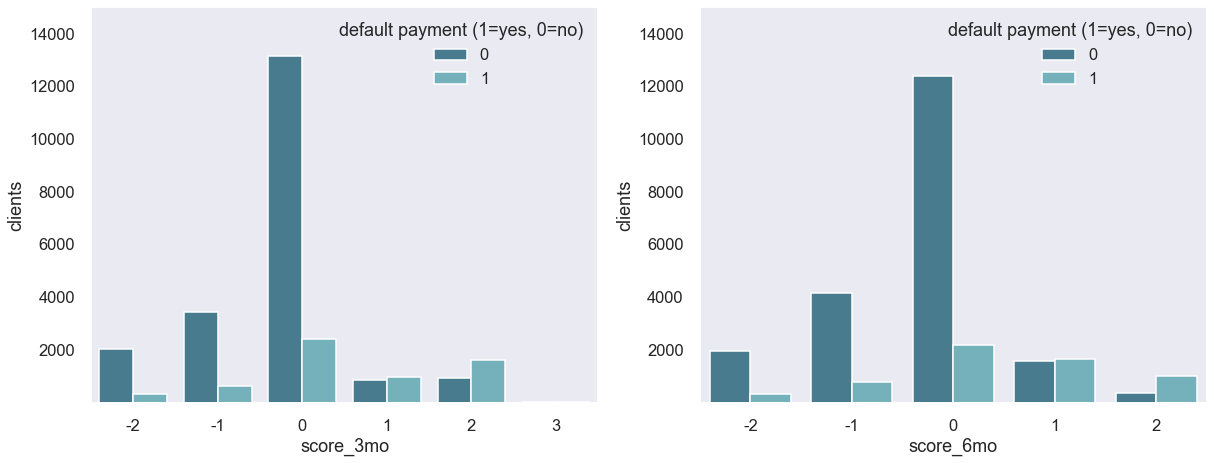

In [167]:
#Let's create plots of the payment history columns' weighted average
cat = ['score_3mo', 'score_6mo']
columns = ['score_3mo','score_6mo','default_payment_next_month', 'id']
pivot = df[columns]
func.plot_cat(pivot, cat)

#### Based on the above plots:

- there are clients with good standing or score that are still classified as likely to default


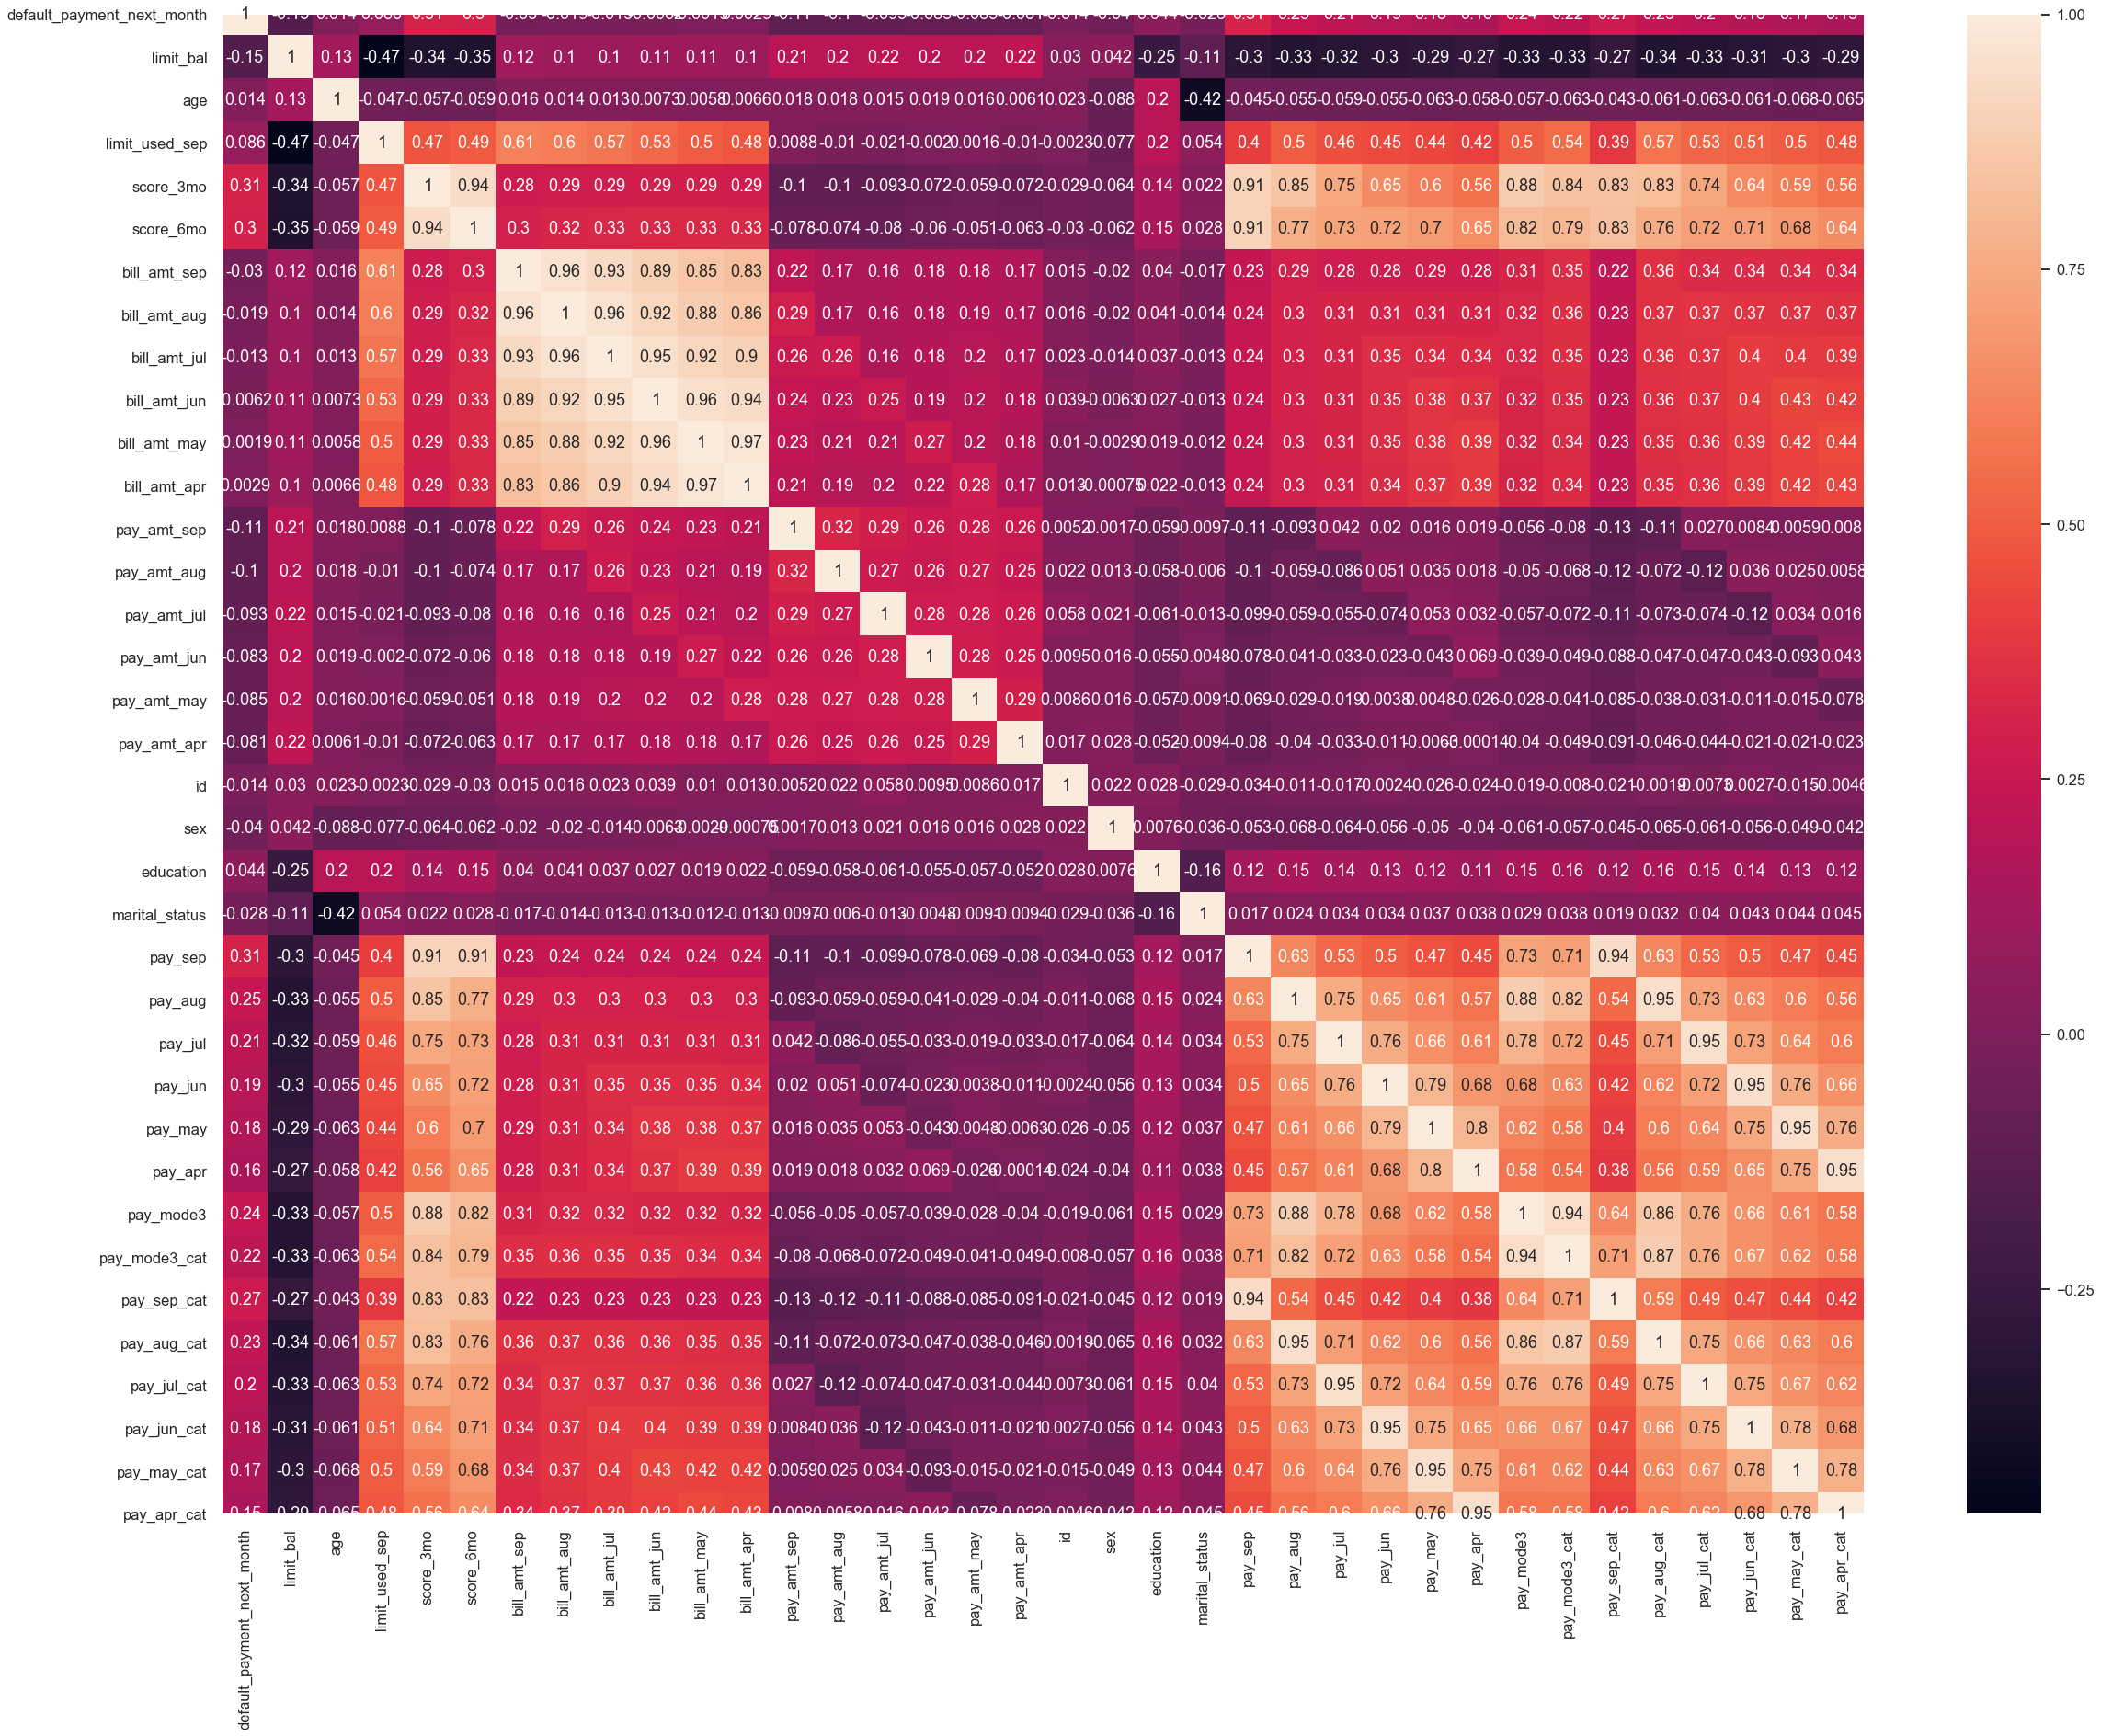

In [168]:
plt.figure(figsize=(40, 30))
sns.heatmap(data = df.corr(), annot=True);

In [169]:
print(df.drop(['pay_mode3', 'pay_mode3_cat', 'pay_sep_cat', 'pay_aug_cat',
       'pay_jul_cat', 'pay_jun_cat', 'pay_may_cat', 'pay_apr_cat', 'age_cat'],
        axis =1).corr()["default_payment_next_month"].sort_values(ascending=False).head(10))
df.drop(['pay_mode3', 'pay_mode3_cat', 'pay_sep_cat', 'pay_aug_cat',
       'pay_jul_cat', 'pay_jun_cat', 'pay_may_cat', 'pay_apr_cat', 'age_cat'],
        axis =1).corr()["default_payment_next_month"].sort_values(ascending=False).tail(5)

default_payment_next_month    1.000000
score_3mo                     0.310623
pay_sep                       0.309711
score_6mo                     0.299954
pay_aug                       0.247546
pay_jul                       0.214255
pay_jun                       0.193019
pay_may                       0.177548
pay_apr                       0.161069
limit_used_sep                0.086033
Name: default_payment_next_month, dtype: float64


pay_amt_may   -0.085049
pay_amt_jul   -0.093040
pay_amt_aug   -0.104132
pay_amt_sep   -0.106153
limit_bal     -0.149767
Name: default_payment_next_month, dtype: float64

#### Based on the above matrix:

-  'default_payment_next_month' has no strong correlation with any of the features.
- 'pay_apr' to 'pay_sep' columns are highly correlated.
- 'bill_amt_apr' to 'bill_amt_sep' columns are highly correlated.

In [170]:
df.to_csv("df_cleaned.csv", index = False)

In [3]:
df = pd.read_csv("df_cleaned.csv")

In [172]:
df.columns

Index(['default_payment_next_month', 'limit_bal', 'age', 'limit_used_sep',
       'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'id', 'sex', 'education',
       'marital_status', 'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may',
       'pay_apr', 'pay_mode3', 'pay_mode3_cat', 'pay_sep_cat', 'pay_aug_cat',
       'pay_jul_cat', 'pay_jun_cat', 'pay_may_cat', 'pay_apr_cat', 'age_cat'],
      dtype='object')

#  Models

#### Logistic Regression. In this section, we will do the following:

- Preprocess the dataset:
    - Determine the categorical and continuous features then convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Create a baseline model.
- Use SelectForModel for feature selection then run Logistic Regression again.
- Select features manually and run a model then compare the scores.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [173]:
#Create categorical and continuous features column header lists
cat_columns = ['sex', 'education', 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr']

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.preprocess_data(df, cat_columns, cf_columns)

#Create a baseline model
logregbase = LogisticRegression()
baseline = cross_val_score(logregbase, X_train_rs, y_train_rs, cv=10, scoring = "f1")
mean_score = np.mean(baseline)
print(f"Mean Cross Validation Score: {mean_score :.2%}")

dummy variables created
split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
Mean Cross Validation Score: 67.68%


In [174]:
#Convert cat to dummies, split the data then run SMOTE and SelectFromModel
selected, X_train_selected, X_test_selected, y_train, y_test = func.feature_selection_Logistic(df, cat_columns, cf_columns)

dummy variables created
split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
scaling done
30  features selected out of  73


In [175]:
#Selected features by SelectFromModel
selected_list = [key for key, value in selected.items() if value == True]
selected_list

['limit_used_sep',
 'bill_amt_sep',
 'bill_amt_aug',
 'bill_amt_jul',
 'bill_amt_jun',
 'bill_amt_may',
 'pay_amt_sep',
 'pay_amt_aug',
 'pay_amt_jul',
 'pay_amt_may',
 'pay_amt_apr',
 'education_others',
 'pay_sep_0',
 'pay_sep_2',
 'pay_sep_3',
 'pay_sep_4',
 'pay_aug_0',
 'pay_aug_4',
 'pay_aug_5',
 'pay_jun_4',
 'pay_jun_5',
 'pay_may_5',
 'pay_apr_3',
 'pay_apr_4',
 'pay_apr_5',
 'score_3mo_1',
 'score_3mo_2',
 'score_3mo_3',
 'score_6mo_0',
 'score_6mo_1']

---------------------------------------------------------------------
F1 score:  0.5149456521739131
Precision-Recall AUC: 0.5134350684714805


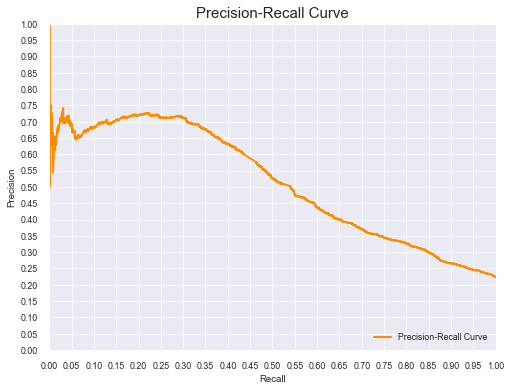

---------------------------------------------------------------------


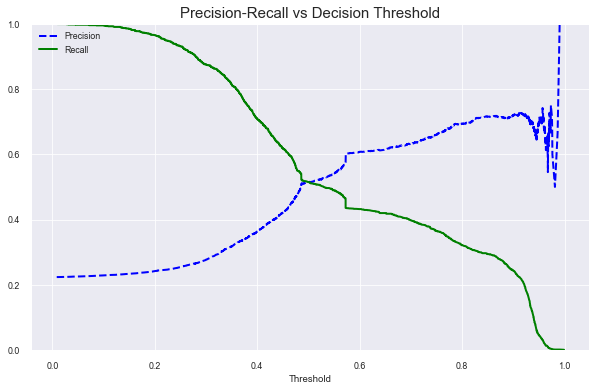

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5113
           1       0.51      0.51      0.51      1472

    accuracy                           0.78      6585
   macro avg       0.69      0.69      0.69      6585
weighted avg       0.78      0.78      0.78      6585

---------------------------------------------------------------------
Normalized confusion matrix


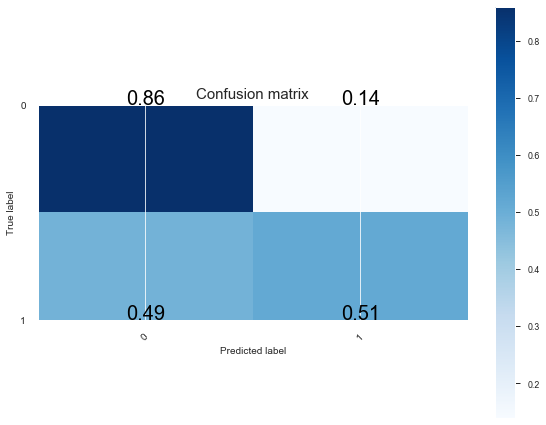

In [176]:
#Run logistic regression using the selected features
func.run_logistic(X_train_selected, X_test_selected, y_train, y_test,  C=1e20, penalty = 'l2', solver = 'lbfgs')

#### Findings

SelectFromModel selected 32 features out of 85. Precision-Recall AUC is 0.56 while weighted F1 score is 0.55 (better than our baseline).  We will call this logreg model A.

We will then try to select features manually and see if the model will improve. This will be our logreg model B.

dummy variables created
split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
scaling done
---------------------------------------------------------------------
F1 score:  0.5242369838420108
Precision-Recall AUC: 0.5151874779458407


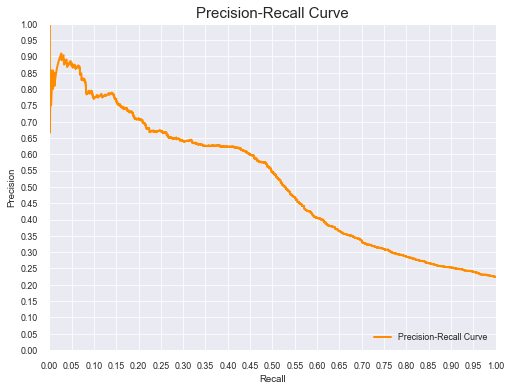

---------------------------------------------------------------------


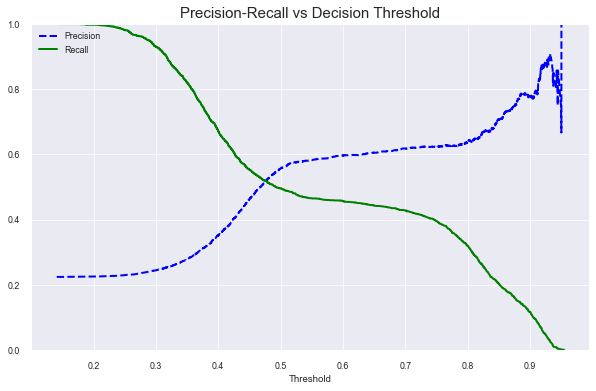

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      5113
           1       0.56      0.50      0.52      1472

    accuracy                           0.80      6585
   macro avg       0.71      0.69      0.70      6585
weighted avg       0.79      0.80      0.79      6585

---------------------------------------------------------------------
Normalized confusion matrix


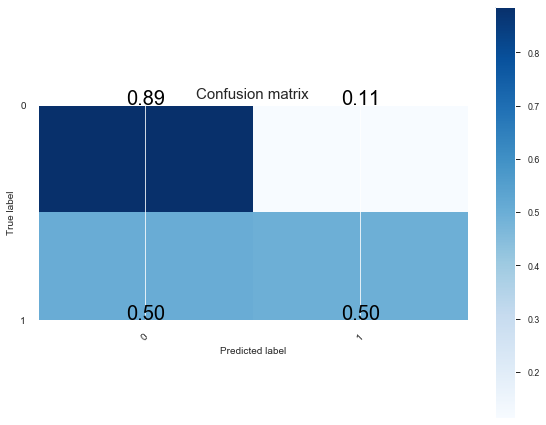

In [177]:
cat_columns = ['sex', 'education', 'marital_status', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep']

X, X_train_rs, X_test, y_train_rs, y_test = func.preprocess_data(df, cat_columns, cf_columns)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)
func.run_logistic(X_train_scaled, X_test_scaled, y_train_rs, y_test)

#### Findings

Logreg model B, though better than our baseline, yielded lower scores compared to our logreg model A.

We will use logreg model A's features to tune the hyperparameters using GridSearchCV.

dummy variables created
split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
scaling done
30  features selected out of  73
running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 1000, 'penalty': 'l2'}
---------------------------------------------------------------------
F1 score:  0.5147707979626486
Precision-Recall AUC: 0.5125584089546331


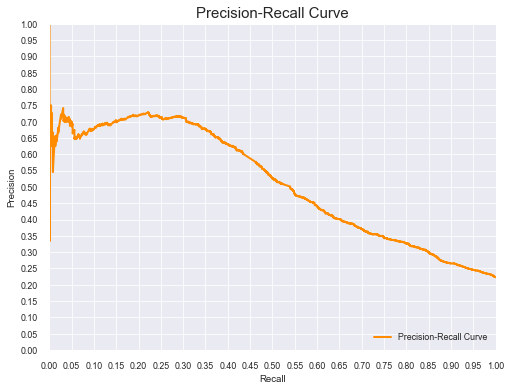

---------------------------------------------------------------------


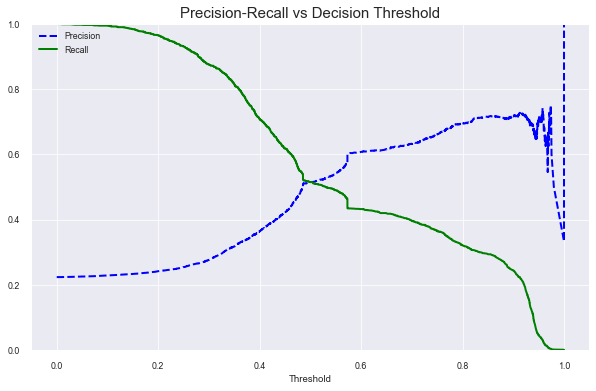

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5113
           1       0.51      0.51      0.51      1472

    accuracy                           0.78      6585
   macro avg       0.69      0.69      0.69      6585
weighted avg       0.78      0.78      0.78      6585

---------------------------------------------------------------------
Normalized confusion matrix


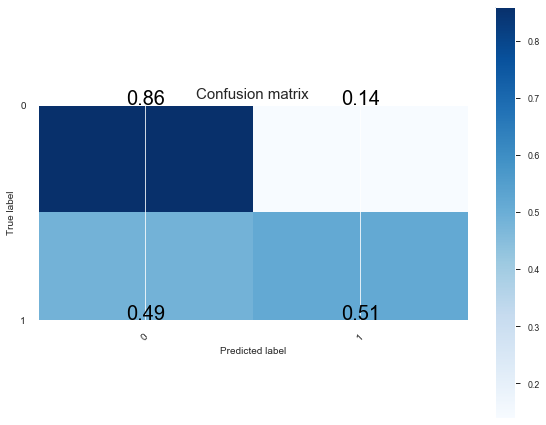

In [178]:
#Again, convert cat to dummies, split the data then run SMOTE and SelectFromModel
cat_columns = ['sex', 'education', 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr']

selected, X_train_selected, X_test_selected, y_train, y_test = func.feature_selection_Logistic(df, cat_columns, cf_columns)

#Create an instance of LogisticRegression
logregGS = LogisticRegression()

#Create hyperparameter options
param_grid = dict(C=[0.1, 0.25, 0.5, 1, 10, 100, 1000, 10000, 100000], penalty=['l1', 'l2'])

#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_selected, X_test_selected, y_train, y_test, logregGS, param_grid, scoring = "f1", cv = 10)

In [179]:
cv_results_top10

rank_test_score                          params  mean_train_score  \
13                1    {'C': 1000, 'penalty': 'l2'}          0.691177   
17                2  {'C': 100000, 'penalty': 'l2'}          0.691166   
15                2   {'C': 10000, 'penalty': 'l2'}          0.691158   
11                2     {'C': 100, 'penalty': 'l2'}          0.691148   
12                5    {'C': 1000, 'penalty': 'l1'}          0.691202   
14                6   {'C': 10000, 'penalty': 'l1'}          0.691173   
10                6     {'C': 100, 'penalty': 'l1'}          0.691204   
9                 8      {'C': 10, 'penalty': 'l2'}          0.690997   
16                9  {'C': 100000, 'penalty': 'l1'}          0.691188   
8                10      {'C': 10, 'penalty': 'l1'}          0.691107   

    std_train_score  mean_test_score  std_test_score  
13         0.003912         0.689755        0.035705  
17         0.003905         0.689708        0.035670  
15         0.003901         0.689708        0.035670  
11         0.003893         0.689708        0.035670  
12         0.003925         0.689613        0.035622  
14         0.003863         0.689540        0.035566  
10         0.003909         0.689540        0.035566  
9          0.003922         0.689497        0.035485  
16         0.003906         0.689493        0.035532  
8          0.003889         0.689471        0.035463

---------------------------------------------------------------------
F1 score:  0.5149456521739131
Precision-Recall AUC: 0.513309291280668


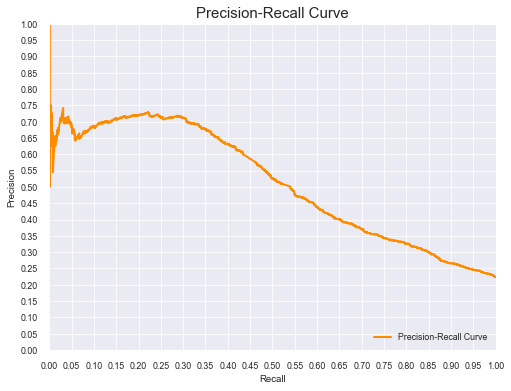

---------------------------------------------------------------------


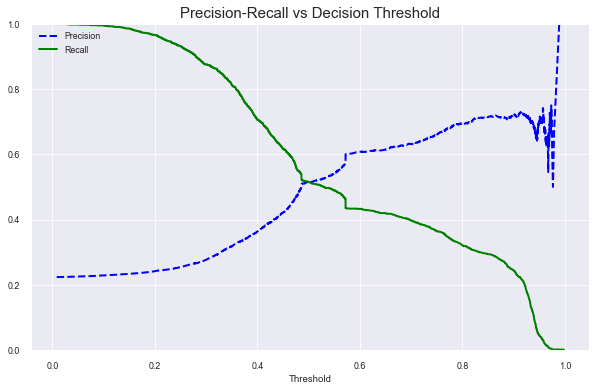

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5113
           1       0.51      0.51      0.51      1472

    accuracy                           0.78      6585
   macro avg       0.69      0.69      0.69      6585
weighted avg       0.78      0.78      0.78      6585

---------------------------------------------------------------------
Normalized confusion matrix


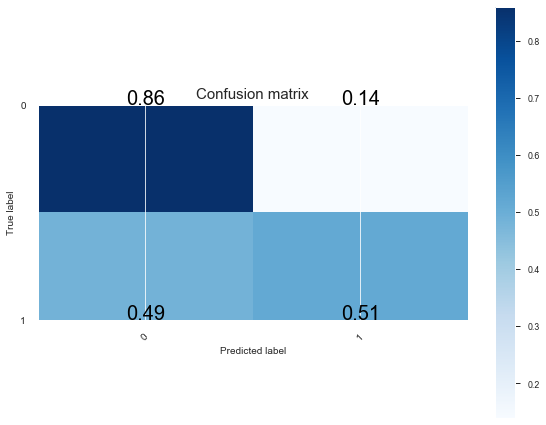

In [180]:
func.run_logistic(X_train_selected, X_test_selected, y_train, y_test,  C=10, penalty = 'l2')

#### Findings

After running GridSearchCV, our best model is the one that uses L1 norm and C = 10. Precision-Recall AUC is 0.56 while F1 score is 0.55.

Top 10 models yielded similar mean test scores.  We tried using L2 norm with C = 10 and got similar results. We ignored the higher C as these models are less regularized.

It's worth noting that the scores are very similar to our logreg models A.

#### Support Vector Classification. In this section, we will:

- Preprocess the datase:
    - Determine the categorical and continuous features then convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Create a baseline model.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [181]:
#Create X column header lists
X_columns = ['sex', 'education', "age", 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
             'limit_bal','limit_used_sep', 'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul',
             'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
             'pay_amt_may', 'pay_amt_apr']

X = df[X_columns]
y = df[["default_payment_next_month"]]

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.split_resample(X,y)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)

split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
scaling done


In [182]:
#Create a baseline model
svc = SVC()
baseline = cross_val_score(svc, X_train_scaled, y_train_rs, cv=10, scoring = "f1")
mean_score = np.mean(baseline)
print(f"Mean Cross Validation Score: {mean_score :.2%}")

Mean Cross Validation Score: 66.89%


---------------------------------------------------------------------
F1 score:  0.5035629453681711
Precision-Recall AUC: 0.5035994024163514


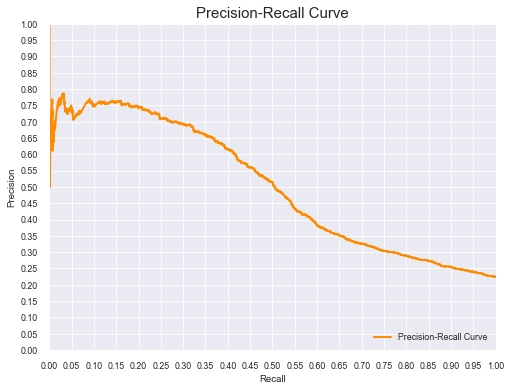

---------------------------------------------------------------------


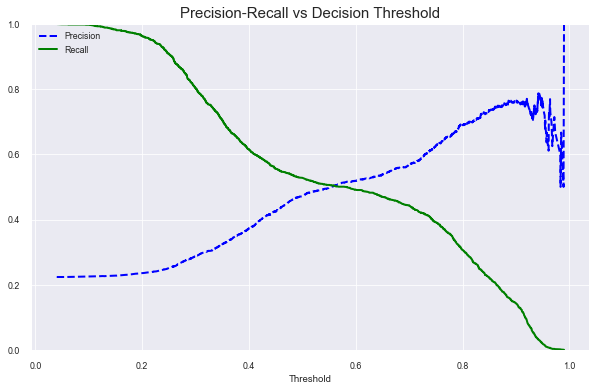

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5113
           1       0.50      0.50      0.50      1472

    accuracy                           0.78      6585
   macro avg       0.68      0.68      0.68      6585
weighted avg       0.78      0.78      0.78      6585

---------------------------------------------------------------------
Normalized confusion matrix


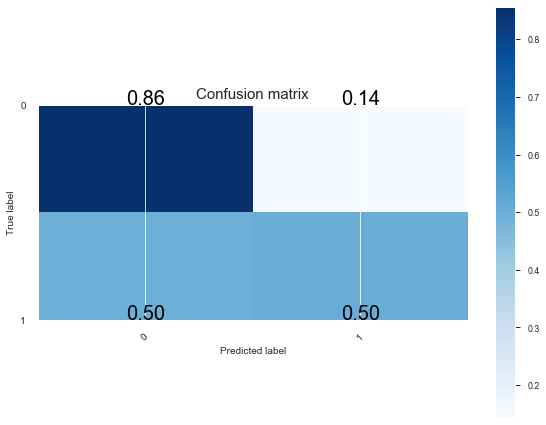

In [183]:
svc = SVC(max_iter=100000,probability=True)
svc.fit(X_train_scaled, y_train_rs)
func.get_scores(svc, X_train_scaled, X_test_scaled, y_train_rs, y_test)

#### Findings

The above model, where we did not provide values for C and gamma, (let's call it SVC model A) gave better results than the baseline model.

We will now try to tune the hyperparameters C and gamma and get the best model.

split done
original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
scaling done
running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 0.001, 'gamma': 5, 'kernel': 'linear'}
---------------------------------------------------------------------
F1 score:  0.4803571428571428
Precision-Recall AUC: 0.4819317070126921


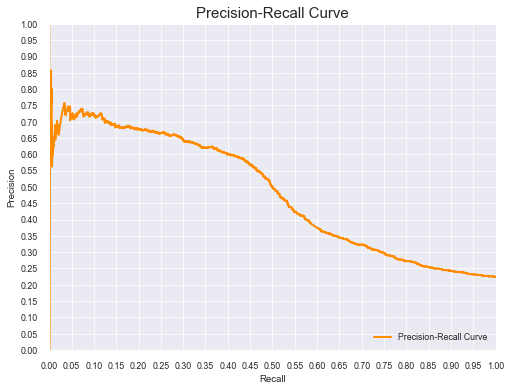

---------------------------------------------------------------------


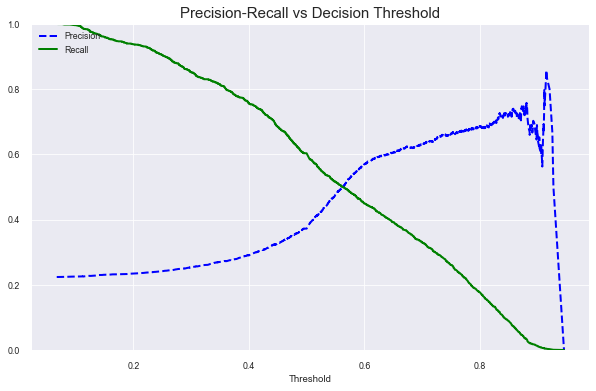

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      5113
           1       0.43      0.55      0.48      1472

    accuracy                           0.73      6585
   macro avg       0.64      0.67      0.65      6585
weighted avg       0.76      0.73      0.75      6585

---------------------------------------------------------------------
Normalized confusion matrix


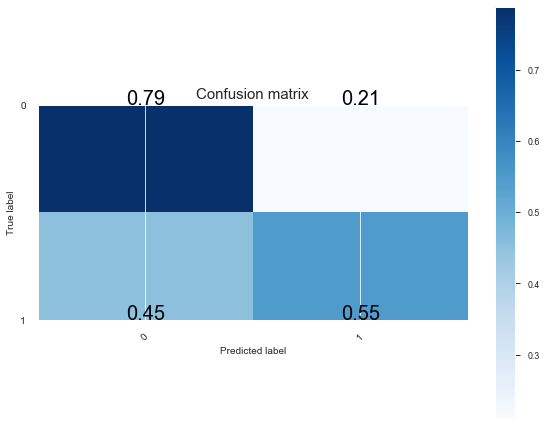

In [184]:
#Create X column header lists
X_columns = ['sex', 'education', "age", 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
             'limit_bal','limit_used_sep', 'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul',
             'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
             'pay_amt_may', 'pay_amt_apr']

X = df[X_columns]
y = df[["default_payment_next_month"]]

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.split_resample(X,y)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)

#Create an instance of LogisticRegression
svcGS = SVC(max_iter=100000,probability=True)

#Create hyperparameter options
param_grid = dict(C=[0.001], gamma =[5], kernel=['linear'])

#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_scaled, X_test_scaled, y_train_rs, y_test,
                                                     svcGS, param_grid, scoring = "f1", cv = 10)

#### Principal Component Analysis. In this section, we will:

- Preprocess the datase:
    - Determine the categorical and continuous features.
    - Run PCA on the continuous features with high correlation.
    - Convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Create a baseline Logistic Regression model.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [4]:
#Create a new df X_PCA that will have all the cf that are similar / highly correlated based on the heatmap above
X_PCA = df[['bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep',
            'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr']]

#Also create dfs for y and categorical and cf that are not part of the PCA
y = df[["default_payment_next_month"]]
X_cat = df[['sex', 'education','marital_status', 'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may','pay_apr']]
X_cf = df[['limit_bal', 'age', 'limit_used_sep', 'score_3mo', 'score_6mo']]

In [5]:
#Scale X_PCA and X_cf
X_cf_scaled = MinMaxScaler().fit_transform(X_cf)
X_cf_scaled = pd.DataFrame(X_cf_scaled, index=X_cf.index, columns = list(X_cf.columns))
X_PCA_scaled = MinMaxScaler().fit_transform(X_PCA)

In [6]:
#Run PCA on the X_PCA_scaled
fitpca = PCA()
pca = fitpca.fit_transform(X_PCA_scaled)

In [7]:
#Check the percentage of variance explained by each cf selected for PCA.
pd.Series(data = fitpca.explained_variance_ratio_, index = range(1, 13))

1     0.669386
2     0.102787
3     0.043298
4     0.039200
5     0.037764
6     0.035819
7     0.030060
8     0.027531
9     0.006860
10    0.003447
11    0.002148
12    0.001701
dtype: float64

In [8]:
#Turn the pca array into df
pca = pd.DataFrame(pca[:, :2], index=X_PCA.index)
pca.rename(columns={0:'c1',1:'c2'}, inplace=True)
pca

c1        c2
0     -0.300501 -0.090008
1     -0.283612 -0.060478
2     -0.157759 -0.041060
3      0.014092 -0.089540
4     -0.107005  0.213225
...         ...       ...
26333  0.351592 -0.036918
26334  0.749858 -0.047050
26335 -0.266489  0.000404
26336 -0.182688  0.133338
26337  0.018390 -0.091254

[26338 rows x 2 columns]

In [9]:
#Check the component
vects = fitpca.components_[:2]

In [10]:
pd.DataFrame(data = vects, columns = X_PCA.columns, index = pca.columns).T

c1        c2
bill_amt_sep  0.465900 -0.136354
bill_amt_aug  0.389430 -0.090527
bill_amt_jul  0.416236 -0.077140
bill_amt_jun  0.404504 -0.042287
bill_amt_may  0.393314 -0.023284
bill_amt_apr  0.334952 -0.014305
pay_amt_sep   0.082872  0.413377
pay_amt_aug   0.058466  0.304212
pay_amt_jul   0.064252  0.418900
pay_amt_jun   0.070212  0.439392
pay_amt_may   0.069824  0.436215
pay_amt_apr   0.057427  0.377459

c1's high component are the bill_amt columns while c2's pay_amt columns

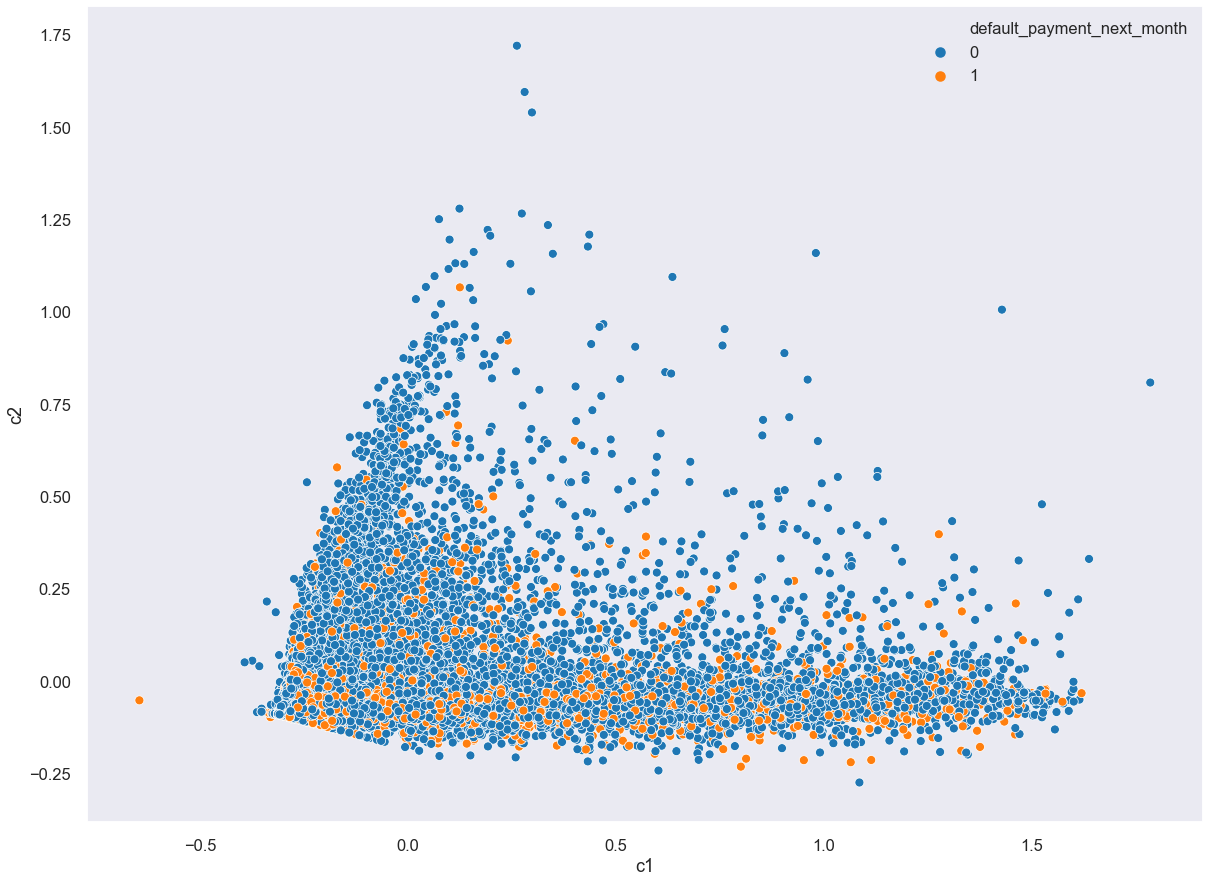

In [11]:
X_pca = pd.concat([pca, X_cf_scaled, X_cat], axis = 1)
df_pca = pd.concat([X_pca, y], axis = 1)
plt.figure(figsize = (20, 15))
sns.scatterplot(data = df_pca, x = "c1", y = "c2", hue = "default_payment_next_month");

The above does not show any clustering so adding c1 and c2 may not improve our model.

We will still try to run a Logistic regression and see if it will yield a better result that our best model above.

In [12]:
#Convert the categorical columns to dummy variables
X_pca = pd.get_dummies(X_pca, columns = list(X_cat.columns), drop_first=True, dtype=float)
X_pca

c1        c2  limit_bal       age  limit_used_sep  score_3mo  \
0     -0.300501 -0.090008   0.018519  0.071429        0.226551        0.6   
1     -0.283612 -0.060478   0.203704  0.119048        0.134507        0.4   
2     -0.157759 -0.041060   0.148148  0.309524        0.295187        0.4   
3      0.014092 -0.089540   0.074074  0.380952        0.621787        0.4   
4     -0.107005  0.213225   0.074074  0.857143        0.214170        0.2   
...         ...       ...        ...       ...             ...        ...   
26333  0.351592 -0.036918   0.129630  0.309524        0.604346        0.8   
26334  0.749858 -0.047050   0.388889  0.428571        0.578795        0.4   
26335 -0.266489  0.000404   0.259259  0.523810        0.128596        0.2   
26336 -0.182688  0.133338   0.037037  0.380952        0.185752        1.0   
26337  0.018390 -0.091254   0.074074  0.595238        0.631761        0.4   

       score_6mo  sex_2  education_2  education_3  education_4  \
0           0.75    1.0          1.0          0.0          0.0   
1           0.50    1.0          1.0          0.0          0.0   
2           0.50    1.0          1.0          0.0          0.0   
3           0.50    1.0          1.0          0.0          0.0   
4           0.25    0.0          1.0          0.0          0.0   
...          ...    ...          ...          ...          ...   
26333       1.00    0.0          1.0          0.0          0.0   
26334       0.50    0.0          0.0          1.0          0.0   
26335       0.25    0.0          0.0          1.0          0.0   
26336       1.00    0.0          1.0          0.0          0.0   
26337       0.50    0.0          1.0          0.0          0.0   

       marital_status_2  marital_status_3  pay_sep_-1  pay_sep_0  pay_sep_1  \
0                   0.0               0.0         0.0        0.0        0.0   
1                   1.0               0.0         1.0        0.0        0.0   
2                   1.0               0.0         0.0        1.0        0.0   
3                   0.0               0.0         0.0        1.0        0.0   
4                   0.0               0.0         1.0        0.0        0.0   
...                 ...               ...         ...        ...        ...   
26333               1.0               0.0         0.0        0.0        0.0   
26334               0.0               0.0         0.0        1.0        0.0   
26335               1.0               0.0         1.0        0.0        0.0   
26336               1.0               0.0         0.0        0.0        0.0   
26337               0.0               0.0         0.0        1.0        0.0   

       pay_sep_2  pay_sep_3  pay_sep_4  pay_aug_-1  pay_aug_0  pay_aug_1  \
0            1.0        0.0        0.0         0.0        0.0        0.0   
1            0.0        0.0        0.0         0.0        0.0        0.0   
2            0.0        0.0        0.0         0.0        1.0        0.0   
3            0.0        0.0        0.0         0.0        1.0        0.0   
4            0.0        0.0        0.0         0.0        1.0        0.0   
...          ...        ...        ...         ...        ...        ...   
26333        1.0        0.0        0.0         0.0        0.0        0.0   
26334        0.0        0.0        0.0         0.0        1.0        0.0   
26335        0.0        0.0        0.0         1.0        0.0        0.0   
26336        0.0        0.0        1.0         0.0        0.0        0.0   
26337        0.0        0.0        0.0         0.0        1.0        0.0   

       pay_aug_2  pay_aug_3  pay_aug_4  pay_aug_5  pay_aug_6  pay_jul_-1  \
0            1.0        0.0        0.0        0.0        0.0         1.0   
1            1.0        0.0        0.0        0.0        0.0         0.0   
2            0.0        0.0        0.0        0.0        0.0         0.0   
3            0.0        0.0        0.0        0.0        0.0         0.0   
4            0.0        0.0        0.0        0.0    

In [13]:
#We will now run a Logistic Regression model using the above X_pca
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

#Run SMOTE to handle the class imbalance
smote = SMOTE(sampling_strategy = "not majority", random_state = 42)
X_train_rs, y_train_rs = smote.fit_sample(X_train, y_train)
print('original class distribution:')
print(y["default_payment_next_month"].value_counts())
print('synthetic sample class distribution:')
print(pd.Series(y_train_rs).value_counts()) 

#Run SelectFromModel for feature selection
selector = SelectFromModel(LogisticRegression(fit_intercept=True, C=10, penalty ='l2'))
selector.fit(X_train_rs, y_train_rs)
selected_feat = list(X_pca.columns[(selector.get_support())])
selected = dict(zip((list(X_pca.columns)), list(selector.get_support())))
X_train_selected = selector.transform(X_train_rs)
X_test_selected = selector.transform(X_test)
print(sum(selector.get_support())," features selected out of ", len(list(X_pca.columns)))
selected_list = [key for key, value in selected.items() if value == True]
selected_list

original class distribution:
0    20416
1     5922
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15303
0    15303
dtype: int64
18  features selected out of  56


['c2',
 'limit_bal',
 'limit_used_sep',
 'score_3mo',
 'education_4',
 'pay_sep_-1',
 'pay_sep_1',
 'pay_sep_2',
 'pay_sep_3',
 'pay_sep_4',
 'pay_aug_4',
 'pay_aug_5',
 'pay_aug_6',
 'pay_jul_1',
 'pay_jun_5',
 'pay_may_5',
 'pay_apr_5',
 'pay_apr_6']

---------------------------------------------------------------------
F1 score:  0.5066832452595585
Precision-Recall AUC: 0.5082133228277175


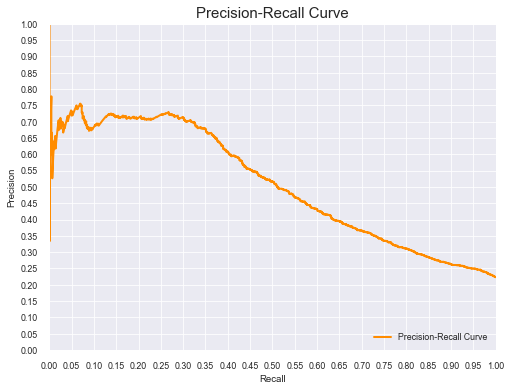

---------------------------------------------------------------------


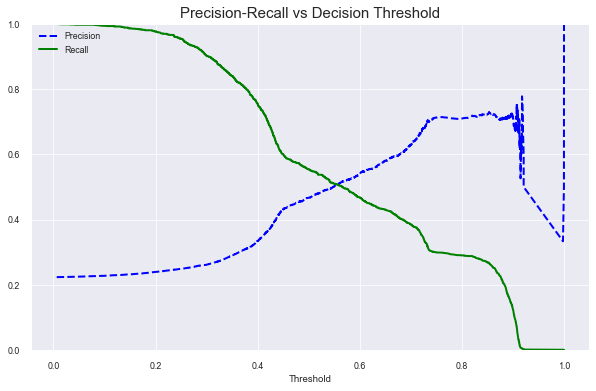

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      5113
           1       0.47      0.55      0.51      1472

    accuracy                           0.76      6585
   macro avg       0.67      0.69      0.67      6585
weighted avg       0.78      0.76      0.77      6585

---------------------------------------------------------------------
Normalized confusion matrix


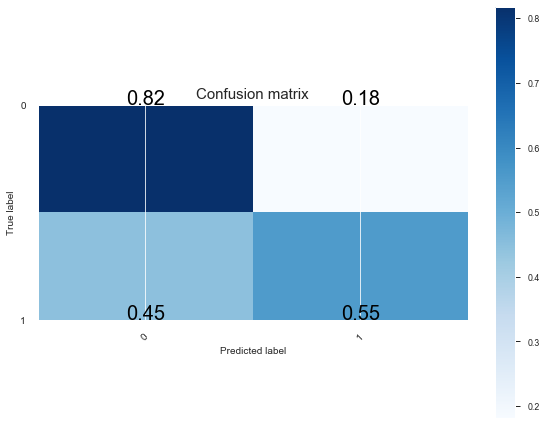

In [14]:
func.run_logistic(X_train_selected, X_test_selected, y_train_rs, y_test)

running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 1000, 'penalty': 'l1'}
---------------------------------------------------------------------
F1 score:  0.5073049424930058
Precision-Recall AUC: 0.5107404220408498


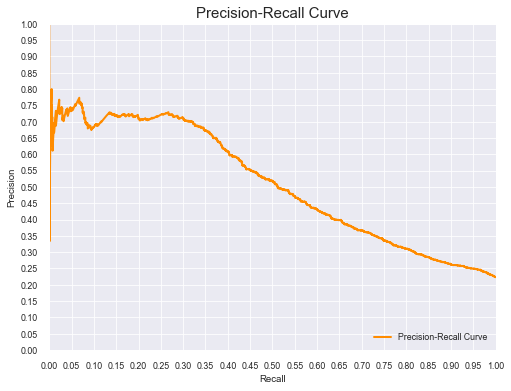

---------------------------------------------------------------------


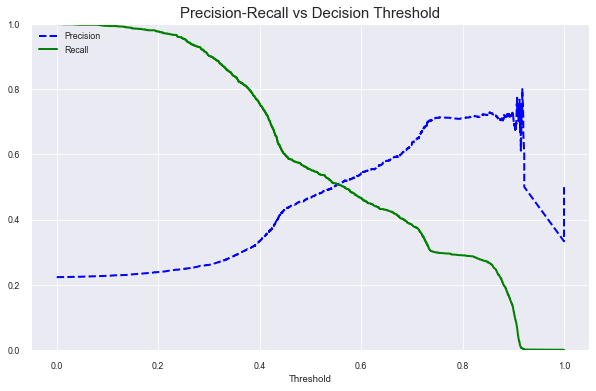

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      5113
           1       0.47      0.55      0.51      1472

    accuracy                           0.76      6585
   macro avg       0.67      0.69      0.67      6585
weighted avg       0.78      0.76      0.77      6585

---------------------------------------------------------------------
Normalized confusion matrix


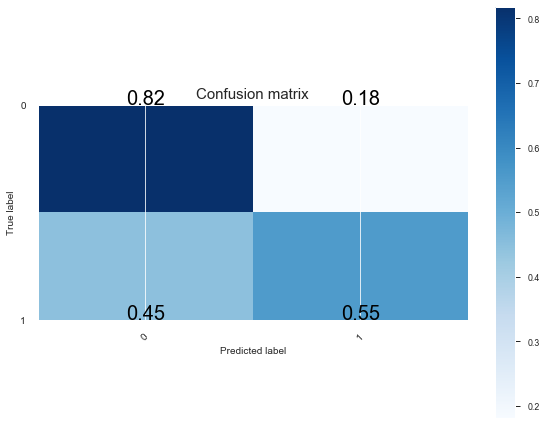

In [15]:
#Create an instance of LogisticRegression
logregGS = LogisticRegression()

#Create hyperparameter options
param_grid = dict(C=[0.1, 0.25, 0.5, 1, 10, 100, 1000, 10000, 100000], penalty=['l1', 'l2'])

#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_selected, X_test_selected, y_train_rs, y_test, logregGS, param_grid, scoring = "f1", cv = 10)

In [16]:
cv_results_top10

rank_test_score                          params  mean_train_score  \
12                1    {'C': 1000, 'penalty': 'l1'}          0.653323   
7                 2       {'C': 1, 'penalty': 'l2'}          0.652908   
11                3     {'C': 100, 'penalty': 'l2'}          0.653307   
17                4  {'C': 100000, 'penalty': 'l2'}          0.653326   
15                4   {'C': 10000, 'penalty': 'l2'}          0.653315   
14                4   {'C': 10000, 'penalty': 'l1'}          0.653318   
13                4    {'C': 1000, 'penalty': 'l2'}          0.653310   
10                4     {'C': 100, 'penalty': 'l1'}          0.653326   
16                4  {'C': 100000, 'penalty': 'l1'}          0.653321   
8                10      {'C': 10, 'penalty': 'l1'}          0.653307   

    std_train_score  mean_test_score  std_test_score  
12         0.001315         0.652993        0.007569  
7          0.001217         0.652950        0.007862  
11         0.001296         0.652917        0.007717  
17         0.001297         0.652891        0.007692  
15         0.001293         0.652891        0.007692  
14         0.001312         0.652891        0.007692  
13         0.001294         0.652891        0.007692  
10         0.001299         0.652891        0.007692  
16         0.001319         0.652891        0.007692  
8          0.001281         0.652891        0.007730

---------------------------------------------------------------------
F1 score:  0.5060766593954503
Precision-Recall AUC: 0.5162673306486834


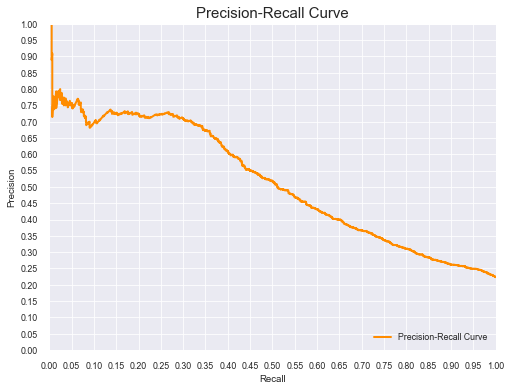

---------------------------------------------------------------------


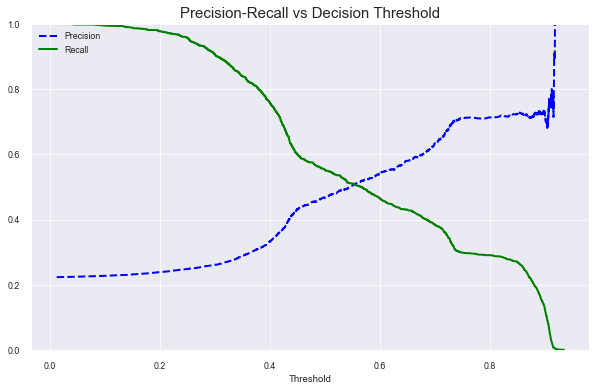

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      5113
           1       0.47      0.55      0.51      1472

    accuracy                           0.76      6585
   macro avg       0.67      0.69      0.67      6585
weighted avg       0.78      0.76      0.77      6585

---------------------------------------------------------------------
Normalized confusion matrix


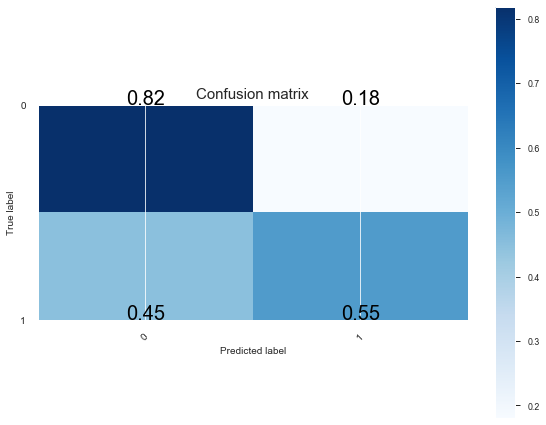

In [17]:
func.run_logistic(X_train_selected, X_test_selected, y_train_rs, y_test, penalty = 'l2', C = 1)

---------------------------------------------------------------------
F1 score:  0.5068407960199004
Precision-Recall AUC: 0.5114941646746692


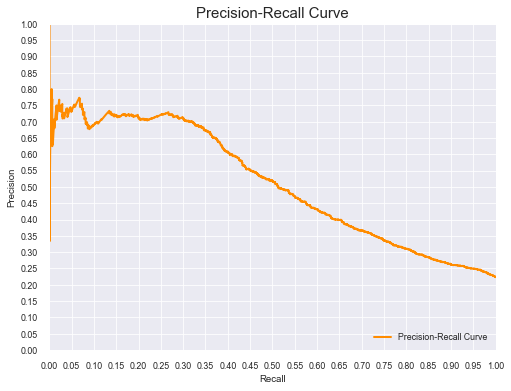

---------------------------------------------------------------------


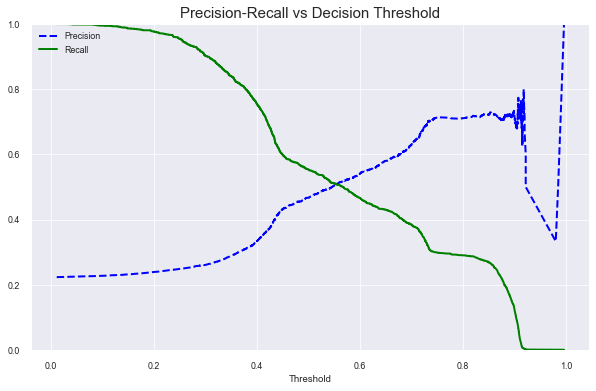

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      5113
           1       0.47      0.55      0.51      1472

    accuracy                           0.76      6585
   macro avg       0.67      0.69      0.67      6585
weighted avg       0.78      0.76      0.77      6585

---------------------------------------------------------------------
Normalized confusion matrix


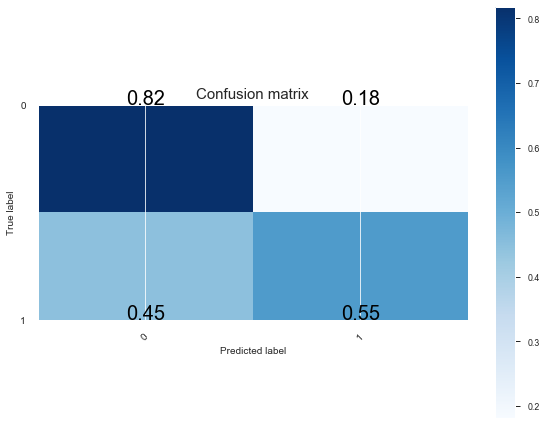

In [18]:
func.run_logistic(X_train_selected, X_test_selected, y_train_rs, y_test, penalty = 'l2', C = 10)

#### Findings

Precision-Recall AUCs and F1 scores of the above models are not better than our logreg and SVM models.